In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from unicodedata import normalize

# Leitura do CSV
csv = pd.read_csv('./results.csv', sep=',')
csv.head()

,title,subtitle,author,date,section,text,url
0,“A sociedade foi Rubens Paiva não os facínora...,A decisão da juíza que proíbe as Forças Armada...,F. M.,30/03/2019 00:11:08,Brasil,A juíza federal Ivani Silva da Luz de Brasíli...,https://brasil.elpais.com/brasil/2019/03/26/po...
1,Justiça suspende decisão que proibia Forças Ar...,Liminar havia sido concedida na sexta-feira a ...,Marina Rossi,30/03/2019 16:17:59,Brasil,Menos de 24 horas depois de a juíza federal Iv...,https://brasil.elpais.com/brasil/2019/03/30/po...
2,Governo Bolsonaro prega “negacionismo históric...,Marcos Napolitano professor da USP diz que o...,Regiane Oliveira,04/04/2019 22:37:48,Brasil,Quando determinou que de 31 de março 1964 u...,https://brasil.elpais.com/brasil/2019/04/05/po...
3,Quando os pais de Gabo perceberam que tinham u...,Gustavo Tatis percorre o universo de García Má...,Jesús Ruiz Mantilla,07/03/2019 16:38:56,Cultura,Quando era pequeno Luisa e Gabriel se preo...,https://brasil.elpais.com/brasil/2019/03/06/cu...
4,Rádios canadenses banem músicas de Michael Jac...,Quebec Cogeco Media toma a decisão após queixa...,Jaime Porras Ferreyra,07/03/2019 16:12:37,Cultura,Desde a manhã da última segunda-feira e ...,https://brasil.elpais.com/brasil/2019/03/06/cu...


In [42]:
#Questão 1
wordsList = ' '.join(csv.text.values).split(' ')
wordsList = list(filter(None, wordsList))
wordsFormatted = [normalize('NFKD', word.decode('utf-8')).encode('ASCII', 'ignore') for word in wordsList]
words = pd.DataFrame(wordsFormatted, columns=['word'])
words.head()

# Obtendo as frequencias
wordsCount = words.word.value_counts().reset_index()
wordsCount.columns = ['word', 'freq']
wordsCount['r'] = wordsCount.freq.rank(ascending=False)
wordsCount.head(n = 10)

totalOcurrences = wordsCount.freq.sum()
vocabularySize = wordsCount.word.count()
frequency = wordsCount['freq']

table1 = pd.DataFrame(csv.count(), columns=['Total Documents'], index = ['text'])
table1['Total Word Occurrences'] = totalOcurrences
table1['Vocabulary size'] = vocabularySize
table1['Words occurring > 1000 times'] = (frequency > 1000).sum()
table1['Words occurring once'] = (frequency == 1).sum()
table1.head()


,word
0,A
1,juiza
2,federal
3,Ivani
4,Silva


In [38]:
#Questão 2
table2 = wordsCount
table2['Pr(%)'] = (frequency/totalOcurrences) * 100
table2['r.Pr'] = (table2['Pr(%)'] / 100) * table2['r']
table2.head(n = 50)

,word,freq,r,Pr(%),r.Pr
0,de,10122,1.0,4.733114,0.047331
1,a,7179,2.0,3.356947,0.067139
2,e,7040,3.0,3.291950,0.098759
3,que,6506,4.0,3.042248,0.121690
4,o,5470,5.0,2.557808,0.127890
5,do,3435,6.0,1.606229,0.096374
6,em,3071,7.0,1.436020,0.100521
7,da,3050,8.0,1.426200,0.114096
8,um,2563,9.0,1.198476,0.107863
9,para,2218,10.0,1.037151,0.103715


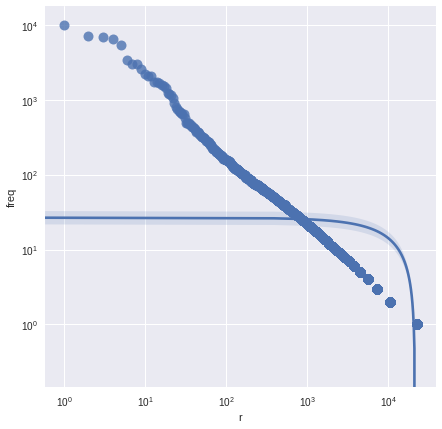

In [39]:
# Questão 3

%matplotlib inline
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot("r", "freq", wordsCount, ax=ax, scatter_kws={"s": 100})

## Bigramas
## TODO

In [40]:
# Questão 4

def getQtdWorsByFrequency(qtd_ocorrencias):
    return ((frequency == qtd_ocorrencias).sum())

table4 = pd.DataFrame(columns=['Number of occurrences', 'Predicted proportion', 'Actual proportion', 'Actual number of words'])
table4['Number of occurrences'] = range(1,11)
table4['Predicted proportion'] = 1/(table4['Number of occurrences'] * (table4['Number of occurrences'] + 1))
actualProportion = [round(float(getQtdWorsByFrequency(ocurr))/totalOcurrences, 4) for ocurr in range(1,11)]
table4['Actual proportion'] = actualProportion
table4['Actual number of words'] = [getQtdWorsByFrequency(ocurr) for ocurr in range(1,11)]

table4.head(10)
table4.style.hide_index()

Number of occurrences,Predicted proportion,Actual proportion,Actual number of words
1,0.5,0.0914,19551
2,0.166667,0.0211,4522
3,0.0833333,0.0101,2165
4,0.05,0.0059,1254
5,0.0333333,0.004,850
6,0.0238095,0.0026,566
7,0.0178571,0.0022,460
8,0.0138889,0.0017,364
9,0.0111111,0.0014,290
10,0.00909091,0.0012,250
